## Probabilidad

<a id="section_intro"></a> 
### Intro

La probabilidad es una medida de la certidumbre o posibilidad asociada a un evento o suceso y se expresa como un número entre 0 y 1.

Es importante conocer las distribuciones de probabilidades y sus aplicaciones para trabajar eficazmente en problemas de ciencia de datos:


* Las distribuciones de probabilidad nos permiten reconocer patrones en variables aleatorias.

* La mayoría de las técnicas de data science o machine learning se basan en ciertos supuestos sobre las distribuciones de probabilidad de nuestros datos.
Por lo tanto, saber qué distribución tienen los datos con los que estamos trabajando, puede ayudarnos a identificar qué técnicas o modelos nos conviene usar.

* Usamos *inferencia* para predecir o analizar tendencias a partir de datos. La *inferencia estadística* se basa en la distribución de probabilidad de estos datos. 

* Una tarea muy frecuente en ciencia de datos es la *imputación de valores faltantes*, en general conocer la distribución de los datos con los que estamos trabajando nos permiten imputar de manera menos arbitraria.


A continuación vamos a revisar / presentar varias distribuciones de probabilidad de variables aleatorias discretas y continuas.

El objetivo es que se familiaricen con ellas y hacia el final las usemos en algunos ejercicios.


![Image](img/prob_distributions.png)



Una **variable aleatoria** es una función que asigna un valor, usualmente numérico, al resultado de un experimento aleatorio, es decir los resultados que se presentan al azar en cualquier evento o experimento.

La **distribución de probabilidad de una variable aleatoria X**, también llamada **función de distribución** de X es la función $F_X(x)$, que asigna a cada evento definido sobre la variable aleatoria $X$ una probabilidad dada por la siguiente expresión:

\begin{equation}
  F_X(x) = P(X \le x)
\end{equation}

Entonces la distribución de probabilidad está completamente especificada por la función de distribución, cuyo valor en cada $x$ real es la probabilidad de que la variable aleatoria sea menor o igual que $x$.

La **función de densidad de probabilidad de una variable aleatoria continua**, función de densidad, o, simplemente, densidad describe la probabilidad relativa, representada comúnmente como $f(x)$, nos permite conocer cómo se distribuyen las probabilidades de un suceso o evento en relación al resultado.
La función de distribución de probabilidad $F(x)$ es la integral de la función de densidad $f(x)$

\begin{equation}
  F_X(x) =  \int^x_{-\infty}f(t)dt
\end{equation}

La probabilidad de que la variable aleatoria caiga en una región específica del espacio de posibilidades estará dada por la integral de la densidad de esta variable entre uno y otro límite de dicha región.
La función de densidad de probabilidad es positiva en todo su dominio y su integral sobre todo el espacio es de valor 1.


### Variables Aleatorias Discretas

Cuando los valores que toma una variable aleatoria son **finitos o infinitos numerables**, se dice que es **discreta**

Ejemplo:

X es el resultado obtenido al lanzar un dado {1, 2, 3, 4, 5, 6}


### Variables Aleatorias Continuas

Cuando los valores que toma una variable aleatoria pueden ser **cualquier valor en un intervalo continuo dado**, se dice que es **continua**

Ejemplo:

X es la altura (sin redondear) de un alumno del curso de Data Science



___
<a id="section_distribuciones"></a> 
### Distribuciones de Probabilidad

Estudiaremos ahora algunas distribuciones de probabilidad particulares. 

Empezaremos con las distribuciones de tipo discreto y continuaremos con las de tipo continuo. 

Observaremos además que las distribuciones pueden depender de uno o más parámetros, es decir, para cada valor de estos parámetros se tiene una distribución de probabilidad diferente. A veces se usa el término “familias de distribuciones paramétricas” para referirse a estas distribuciones.


[Distribución Uniforme](./4.1_uniforme.ipynb)

[Distribución Bernoulli](./4.2_bernoulli.ipynb)

[Distribución Binomial](./4.3_binomial.ipynb)

[Distribución Poisson](./4.4_poisson.ipynb)

[Distribución Normal](./4.5_normal.ipynb)

[Distribución Exponencial](./4.6_exponencial.ipynb)

___

<a id="section_relaciones_distribuciones"></a> 
### Relaciones entre Distribuciones

#### Relación entre Bernoulli y Binomial

La distribución de Bernoulli es un caso particular de la distribucón Binomial con una única repetición.

Si cada evento Bernoulli es **independiente**, entonces el número de éxitos en una serie de observaciones de una variable aleatoria con distribución Bernoulli tiene distribución Binomial. La distribución Bernoulli puede definirse entonces como una Binomial con n = 1.

#### Relación entre Poisson y Binomial

La distribución de Poisson es una distribución Binomial con las siguientes condiciones:

* El número de repeticiones es infinitamente grande $n \rightarrow \infty$

* La probabilidad de éxito de cada repetición es la misma e infinitamente pequeña $p \rightarrow 0$

* $np = \lambda$, es finito.


In [2]:
import numpy as np
random_generator = np.random.default_rng()

In [3]:
import seaborn as sns
def distribution_plotter(data, label, bins=None):    
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style("white")    
    dist = sns.distplot(data, bins= bins, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribucion de ' + label + '\n', fontsize=16)

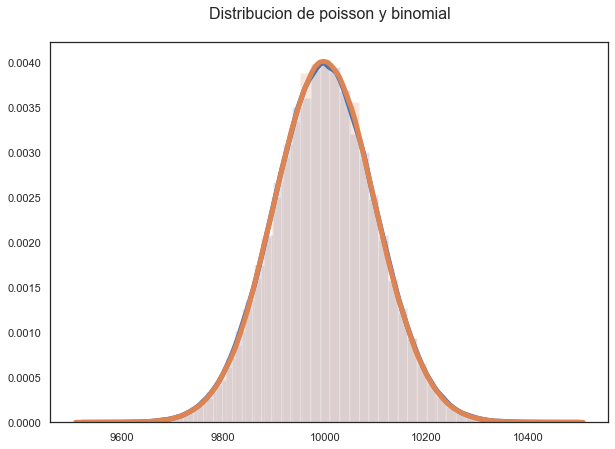

In [4]:
n = 1000000
p = .01
lambda_value = n * p

random_poisson_data = random_generator.poisson(lam = lambda_value, size=n)
random_binomial_data = random_generator.binomial(n, p, size=n)

distribution_plotter(random_poisson_data, "poisson")
distribution_plotter(random_binomial_data, "poisson y binomial")

<div id="caja_binomial_poisson" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>Prueben ahora generando datos para p = 0.1, 0.5 y 0.7 y comparen los gráficos. ¿Qué pueden concluir?</label></div>
</div>


#### Relación entre Normal y Binomial

La distribución normal es el límite de una distribución Binomial con las siguientes condiciones:

* El número de repeticiones en infinitamente grande $n \rightarrow \infty$

* p (probabilidad de éxito) y q (probabilidad de fracaso) no son infinitamente pequeñas simultaneamente

La distribución normal a la que tiende tiene parámetros $\mu = n . p$ y $\sigma^2 = n . p . (1-p)$

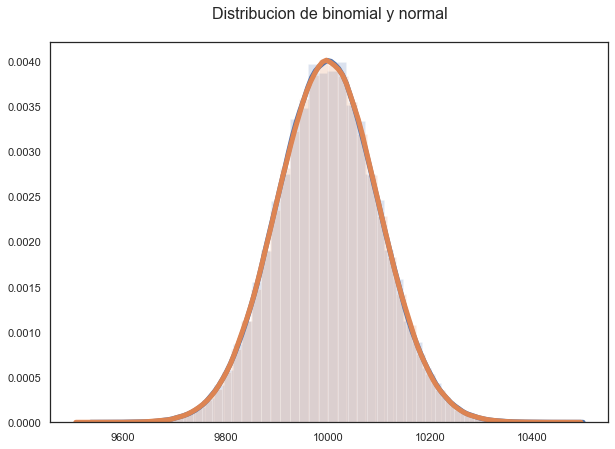

In [5]:
n = 1000000
p = .01

media=n*p
varianza = n*p*(1-p)

random_binomial_data = random_generator.binomial(n, p, size=n)
random_normal_data = random_generator.normal(loc=media, scale=np.sqrt(varianza), size=n)

distribution_plotter(random_binomial_data, "binomial")
distribution_plotter(random_normal_data, "binomial y normal")



<div id="caja_binomial_poisson" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>Prueben ahora generando datos para n = 1000, 10000, 100000 y comparen los gráficos. ¿Qué pueden concluir? <br/>
Observen también que pasa cuando varían los valores de p.</label></div>
</div>

#### Relación entre Normal y Poisson

La distribución normal es el límite de una distribución Poisson con el parámetro $\lambda \rightarrow \infty$


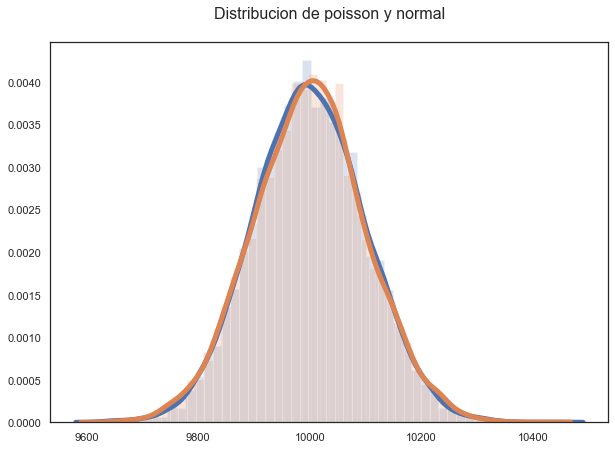

In [6]:
n = 10000

lambda_value = 10000
madia = lambda_value
varianza = lambda_value

random_poisson_data = random_generator.poisson(lam = lambda_value, size=n)
random_normal_data = random_generator.normal(loc=media, scale=np.sqrt(varianza), size=n)

distribution_plotter(random_poisson_data, "poisson")
distribution_plotter(random_normal_data, "poisson y normal")

<div id="caja_binomial_poisson" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>Prueben ahora generando datos para lambda = 1000, 5000 y comparen los gráficos.</label></div>
</div>

#### Relación entre Exponencial y Poisson

Si el tiempo entre eventos sigue una distribución exponencial de parámetro $\lambda$, entonces el número total de eventos en un período de tiempo t sigue una distribución Poisson con parámetro $\lambda{t}$


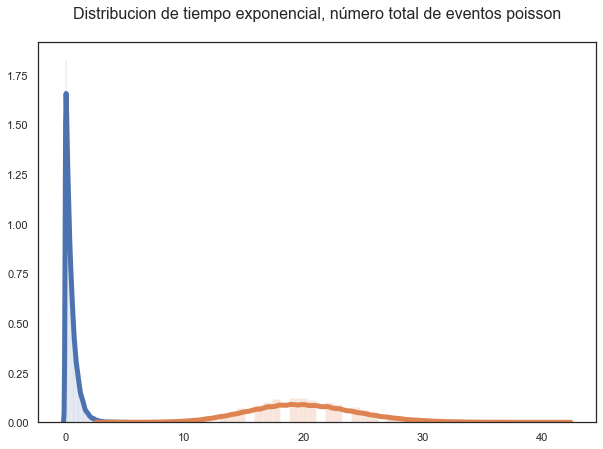

In [7]:
n = 100000
lambda_value = 2
t = 10

beta_value = 1.0/lambda_value

random_exponential_data = random_generator.exponential(scale=beta_value, size=n)
random_poisson_data = random_generator.poisson(lam = lambda_value*t, size=n)

distribution_plotter(random_exponential_data, "exponencial")
distribution_plotter(random_poisson_data, "tiempo exponencial, número total de eventos poisson")

---


<a id="section_conclusiones"></a> 
### Conclusiones

Hay muchas distribuciones de probabilidad, cada una de ellas fue diseñada para analizar datos de diversos orígenes y que tienen ciertas características. En la práctica, estas distribuciones se utilizan para analizar datos reales de un tipo similar. 

Las distribuciones de probabilidad son modelos estadísticos probabilísticos cuyas propiedades se utilizan para analizar datos empíricos: Los datos se recopilan y comparan con cualquier distribución teórica conocida. Si son similares, las propiedades del modelo teórico se transfieren a datos empíricos con las conclusiones correspondientes. 

Este es el enfoque subyacente a los métodos clásicos asociados con la prueba de hipótesis estadísticas (cálculo de intervalos de confianza, comparación de valores promedio, verificación de la importancia de los parámetros, etc.).

Si los datos disponibles no corresponden a ninguna distribución conocida (que muchas veces ocurre en la práctica), no se recomienda utilizar estos modelos estadísticos.

Para resolver este problema, existen otros enfoques asociados con el uso de estadística no paramétrica.
 
